In [1]:
!pip install requests
!pip install bs4
!pip install pandas
!pip install numpy
import requests
from bs4 import BeautifulSoup
import pandas
import numpy as np
from urllib.request import urlopen, Request

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=a4c9b011231fe9addfecbcb14658c1a21dde7b0171984b9eb5a6ec486b174897
  Stored in directory: /Users/penghui/Library/Caches/pip/wheels/19/f5/6d/a97dd4f22376d4472d5f4c76c7646876052ff3166b3cf71050
Successfully built bs4
ERROR: Could not find a version that satisfies the requirement urllib
ERROR: No matching distribution found for urllib


In [3]:
!pip install matplotlib
!pip install wordcloud
!pip install nltk
import os
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [4]:
cwd_dir = os.getcwd() 
title_txt=[]
all_titles=[]
headline_all=[]
for i in range(0,10):
    #url='https://www.investing.com/commodities/crude-oil-news/'+'2'
    #https://www.reuters.com/news/archive/oil?view=page&page=2&pageSize=10
    r = Request('https://www.reuters.com/news/archive/oil?view=page&page='+str(i)+'&pageSize=10', headers={'User-Agent': 'Mozilla/5.0'})
    #print(r)
    #print(url)
    response = urlopen(r).read()
    #print(response)
    site = BeautifulSoup(response, "html.parser")
    #icontents = site.find_all(class_="js-external-link-wrapper articleItem")
    contents=site.find_all('article', {'class': 'story'})
    #print(contents)
    titles=[]
    for content in contents:
        content_title = content.find_all('h3')
        if content_title == []:
            continue
        news_title = content_title[0].text.strip()
        #print(news_title)
        titles.append(news_title)
        headline_all.append(news_title+'\n')
    text="".join(titles)
    #print(text)
    all_titles.append(text)
    title_txt.append( "\nPage"+str(i)+"\n"+text)
    print(i)
all_text="".join(all_titles)
print(all_text)
print(headline_all)

with open(cwd_dir + '/Title_all_10_new.txt', 'w') as title_all_f:
    title_all_f.writelines(title_txt)
with open(cwd_dir+'/Headline_all_10_new.txt','w') as headline_all_f:
    headline_all_f.writelines(headline_all)


0
1
2
3
4
5
6
7
8
9
France's Total pulls all staff from Mozambique gas site amid clashes - sourcesU.S. LNG export bonanza reshapes energy map in AsiaDiesel and petrol prices hiked in SudanPower play - India wields oil 'weapon' to cut dependence on SaudiPioneer's $6.4 billion deal for DoublePoint accelerates U.S. shale oil consolidationCooking oil or crude? Italian restaurant owner was mistaken target of U.S. sanctionsExclusive: Pioneer Natural Resources nears $6 billion DoublePoint Energy deal - sourcesU.S. voices concern to Mexico about 'deteriorating climate' for energy investorsOil companies defeat New York City appeal over global warmingU.S. drillers add most oil rigs in a week since January 2020: Baker HughesSenior officer says Chauvin used 'totally unnecessary' force on George FloydCan Joe Biden recreate the U.S. economy he grew up with?Coronavirus resurgence a bigger worry than inflation - White House's BousheyFrance's Total pulls all staff from Mozambique gas site amid clashes 

In [5]:
#all_text=all_text+text    
stopword=stopwords.words('english')
newStopWords=['hours','last','ago','year','despite','large','shares','well','following','shows','let','Ever','price','UPDATE','UK','Cooper','focus','say','says']
#stopword=stopword.append('hours')
stopword.extend(newStopWords)
wc=WordCloud(mode='RGBA', stopwords=stopword,background_color=None)
wc.generate(text)

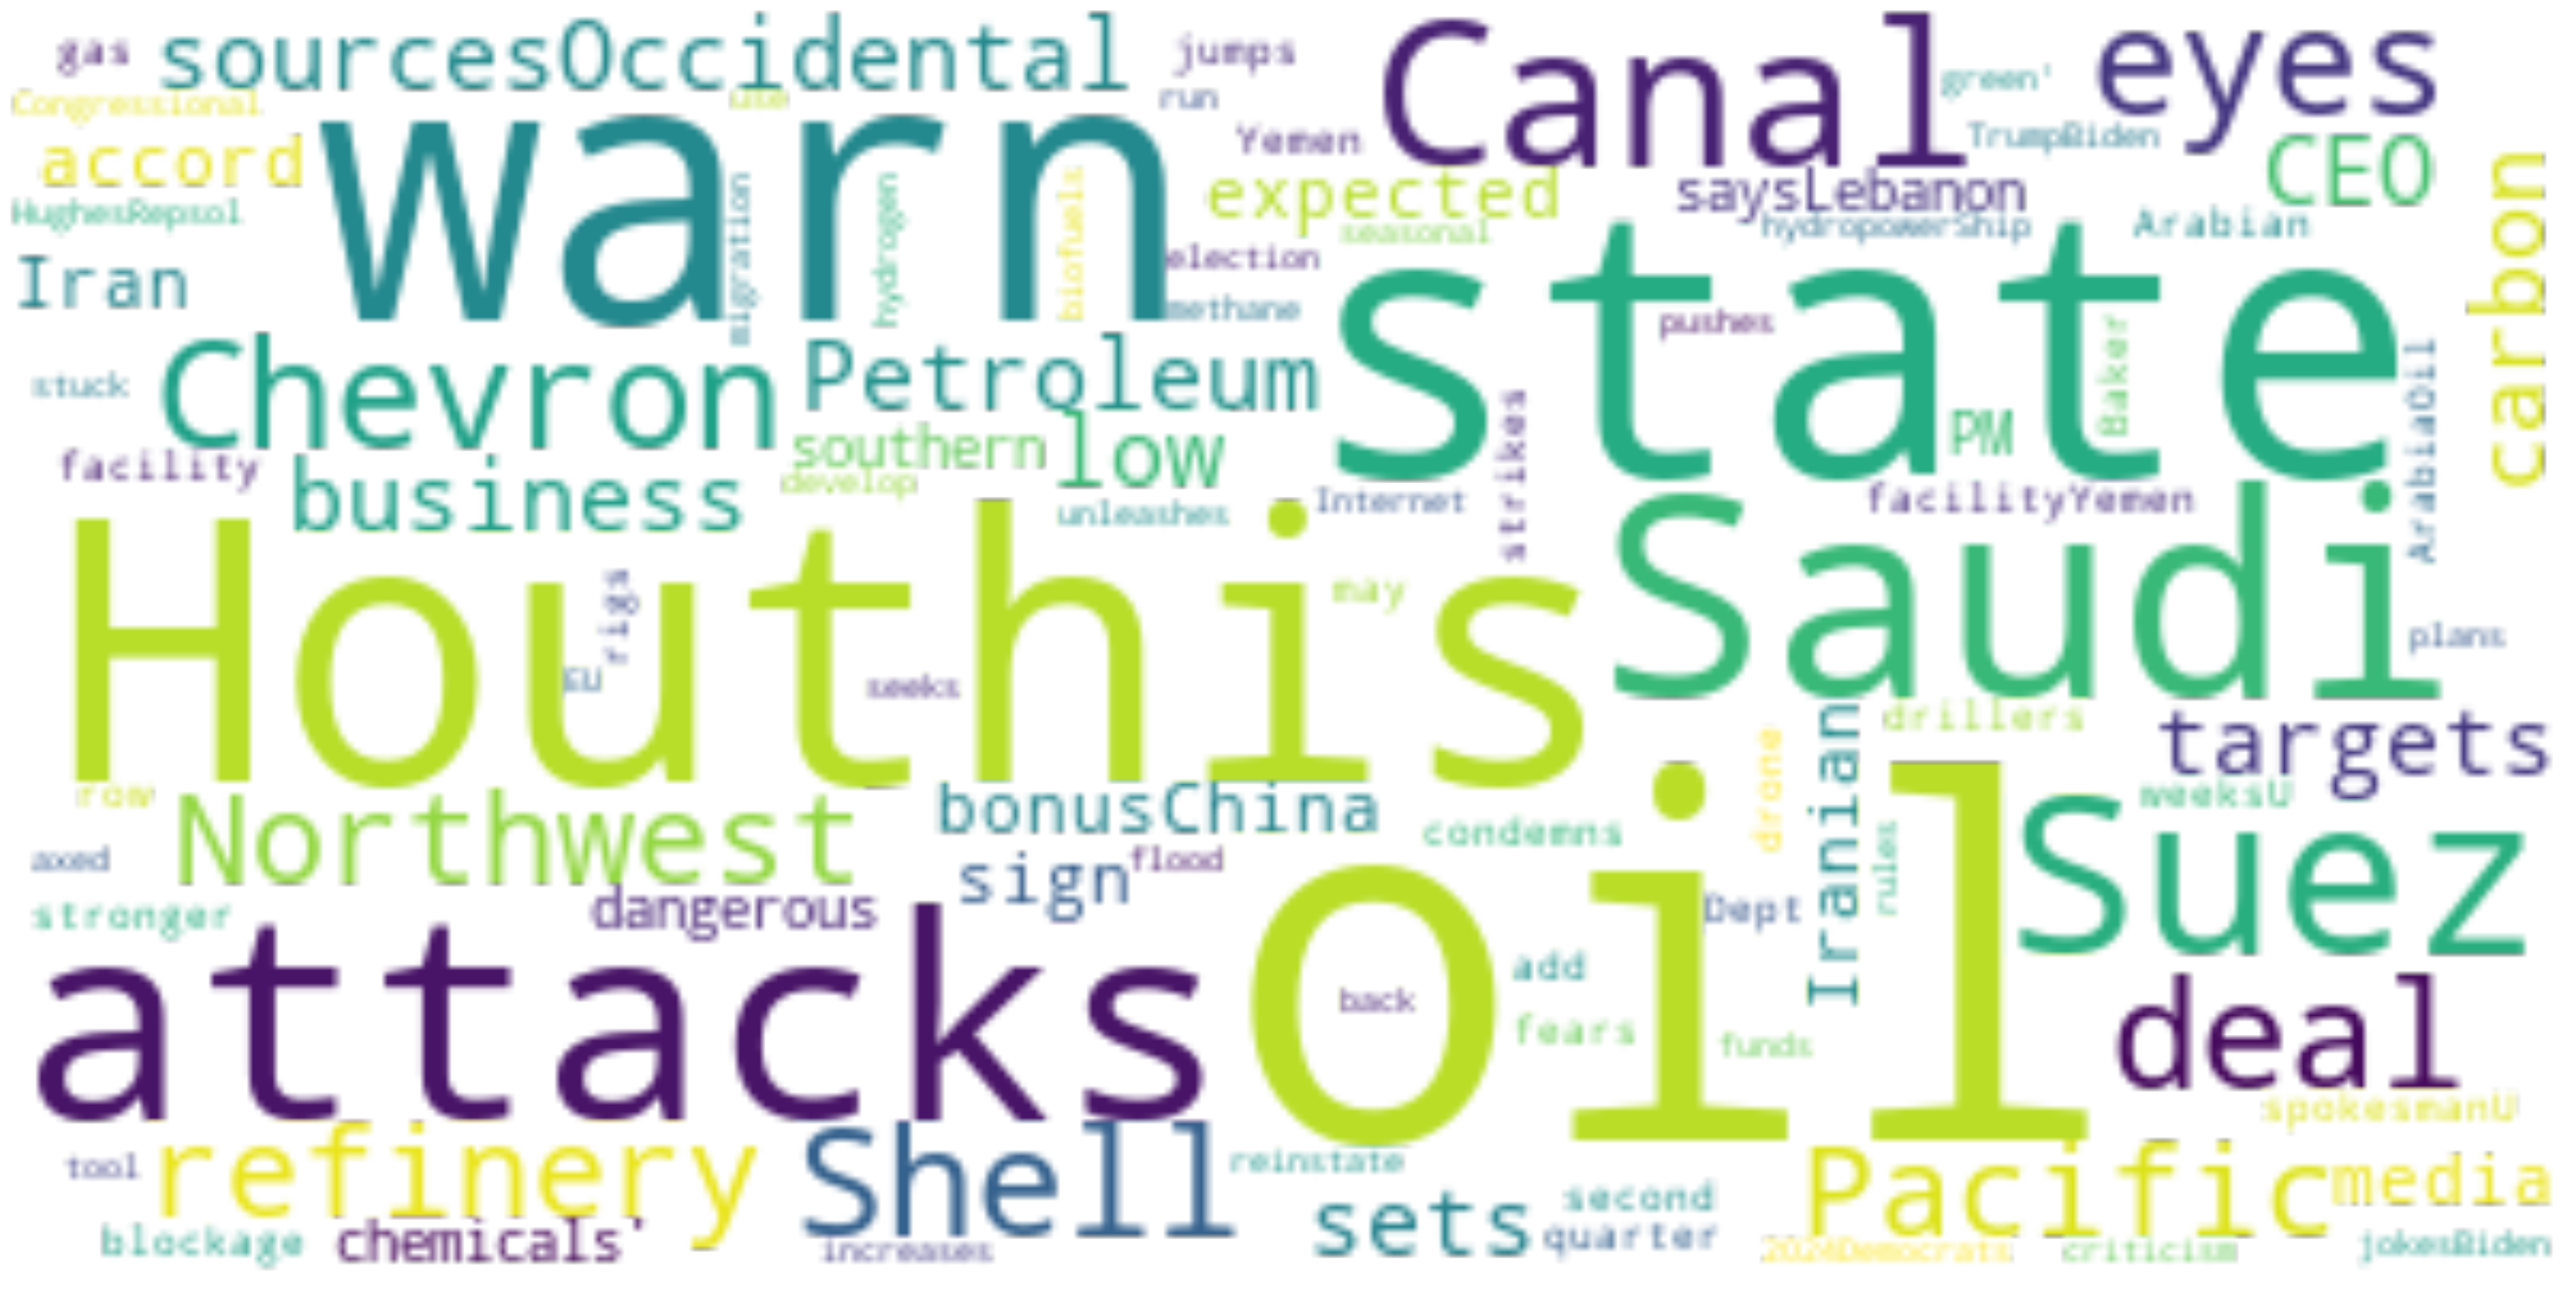

In [6]:
plt.figure(figsize=(50,50))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off") 
plt.show()

In [27]:
!pip install gensim
!pip install pandas
!pip install numpy
import os
import re
import nltk
nltk.download('punkt')
from os import path
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to /Users/penghui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
d = os.getcwd()

text_pre = open(path.join(d, 'Headline_all_10.txt'), encoding = "utf8").read()

doc_l = str.split(text_pre, sep = 'Page')

doc_complete = doc_l

doc_out = []
for l in doc_l:
    
    cleantextprep = str(l)
    
    # Regex cleaning
    expression = "[^a-zA-Z ]" # keep only letters, numbers and whitespace
    cleantextCAP = re.sub(expression, '', cleantextprep) # apply regex
    cleantext = cleantextCAP.lower() # lower case 
    bound = ''.join(cleantext)
    doc_out.append(bound)

doc_complete = doc_out

In [29]:
stop = set(stopwords.words('english'))
stop.add('Page')

exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


doc_clean = [clean(doc).split() for doc in doc_complete]    

[nltk_data] Downloading package wordnet to /Users/penghui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


            1            2
0      "oil"        "oil" 
1      "say"          "u" 
2        "u"        "say" 
3     "suez"       "suez" 
4      "gas"      "canal" 
5    "canal"        "gas" 
6     "deal"       "deal" 
7     "opec"      "biden" 
8   "attack"   "refinery" 
9     "biden"     "attack"
10                        
11                        
12                        
13                        
14                        
15                        
16                        
17                        
18                        
19                        
[[0.024 0.001]
 [0.012 0.001]
 [0.011 0.001]
 [0.009 0.001]
 [0.008 0.001]
 [0.007 0.001]
 [0.006 0.001]
 [0.005 0.   ]
 [0.005 0.   ]
 [0.005 0.   ]
 [0.    0.001]
 [0.    0.001]
 [0.    0.001]
 [0.    0.   ]
 [0.    0.   ]
 [0.    0.   ]
 [0.    0.   ]
 [0.    0.   ]
 [0.    0.   ]
 [0.    0.   ]]


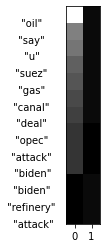

In [30]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]


Lda = gensim.models.ldamodel.LdaModel

ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=20)

K=2
topicWordProbMat=ldamodel.print_topics(K)




columns = ['1','2']
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)

zz = np.zeros(shape=(20,K))

last_number=0
DC={}

for x in range (20):
  data = pd.DataFrame({columns[0]:"",
                     columns[1]:"",
#                     columns[2]:"",
 #                    columns[3]:"",
  #                   columns[4]:"",                                                                                                    
                    },index=[0])
  df=df.append(data,ignore_index=True)  

for line in topicWordProbMat:
    
    tp, w = line
    probs=w.split("+")
    y=0
    for pr in probs:
               
        a=pr.split("*")
        df.iloc[y,tp] = a[1]
       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

print (df)
print (zz)




zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))

for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='center',
                 verticalalignment='center'
                 )

#plt.imshow(zz, cmap='hot', interpolation='nearest')
plt.imshow(zz, cmap=plt.cm.gray, interpolation='nearest')
#plt.show()
plt.yticks([])
plt.savefig("heatmap_oil_news_10_new.png", transparent = True)


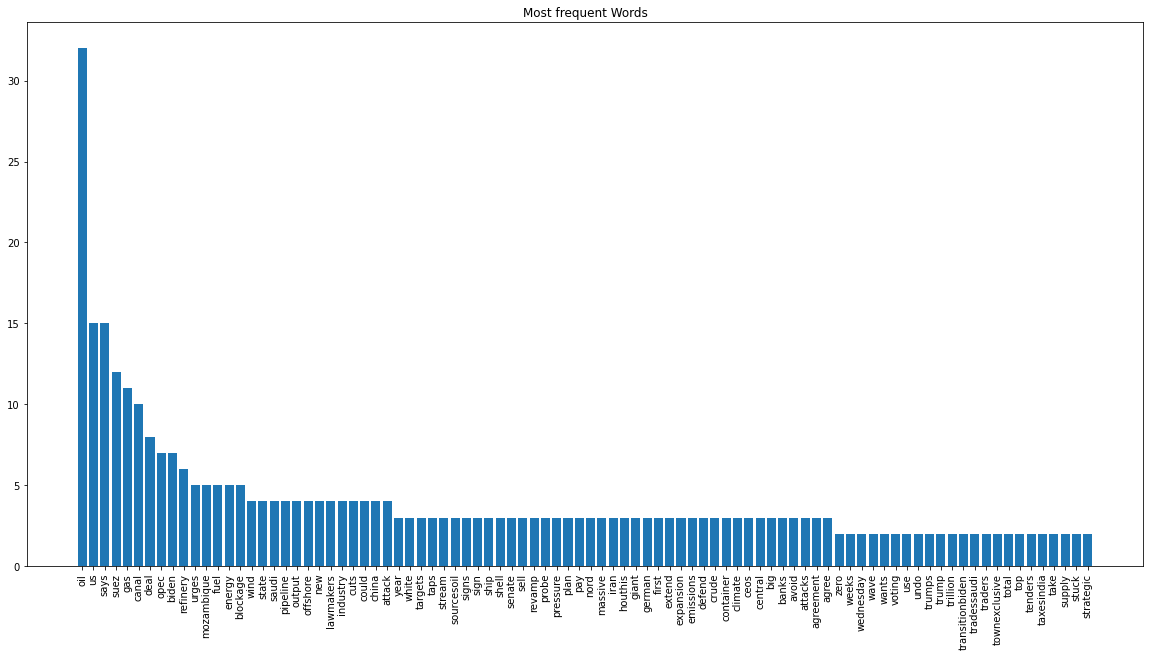

In [31]:
words=str(cleantext).split()
dict1 = {}
for word in words:
    dict1[word] = dict1.get(word,0) + 1
    
keys = list(dict1)

filtered_words = [word for word in keys if word not in stopwords.words('english')]
dict2 = dict((k, dict1[k]) for k in filtered_words if k in filtered_words)


def SequenceSelection(dictionary, length, startindex = 0): 
    
    # Test input
    lengthDict = len(dictionary)
    if length > lengthDict:
        return print("length is longer than dictionary length");
    else:
        d = dictionary
        items = [(v, k) for k, v in d.items()]
        items.sort()
        items.reverse()   
        itemsOut = [(k, v) for v, k in items]
    
        highest = itemsOut[startindex:startindex + length]
        dd = dict(highest)
        wanted_keys = dd.keys()
        dictshow = dict((k, d[k]) for k in wanted_keys if k in d)

        return dictshow;
    
dictshow = SequenceSelection(dictionary = dict2, length = 90, startindex = 0)


    
n = range(len(dictshow))
plt.figure(figsize=(20,10))
plt.bar(n, dictshow.values(), align='center')
plt.xticks(n, dictshow.keys(), rotation = 'vertical')
plt.title("Most frequent Words")
plt.savefig("FrequentWords.png", transparent=True) 

In [32]:
#preprocess text
import re
from string import punctuation
import os
path = os.getcwd()
f = open(os.path.join(path, 'Headline_all_10.txt'), 'rt', encoding='utf-8')
text_file = f.read().split('\n')

text_lower = [text.lower() for text in text_file]
text_letters = [''.join(c for c in s if c not in punctuation) for s in text_lower]

text_final = [re.sub(r'[^A-Za-z]+', ' ', x) for x in text_letters]

with open(os.path.join(path, 'Headline_cleaned_10.txt'), 'w') as fw:
    for text in text_final:
        fw.write(text)
        fw.write('\n')
fw.close()

In [33]:
#hieratical
!pip install scipy
!pip install sklearn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import ward, dendrogram
import os

In [34]:
def tokenize_and_stem(text_file):
    # declaring stemmer and stopwords language
    stemmer = SnowballStemmer("english")
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text_file)
    filtered = [w for w in words if w not in stop_words]
    stems = [stemmer.stem(t) for t in filtered]
    return stems

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


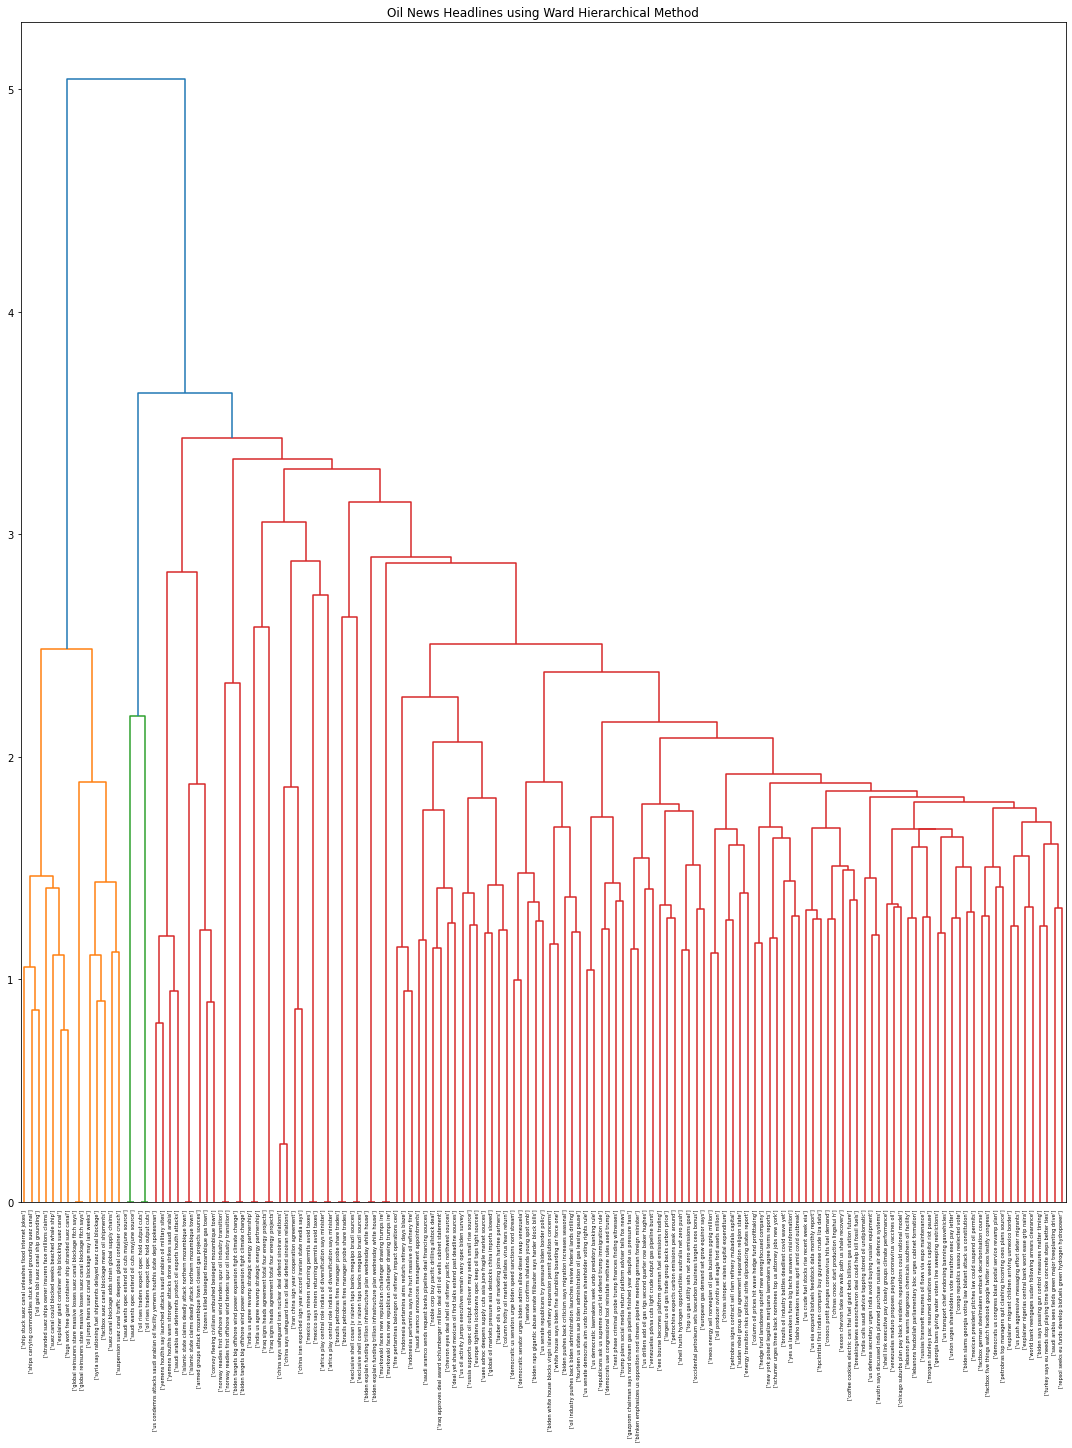

In [35]:
path = os.getcwd()
data = pd.read_csv(os.path.join(path, 'Headline_cleaned_10.txt'), names=['text'])

stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                       use_idf=True,
                                       stop_words='english',
                                       tokenizer=tokenize_and_stem)

tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

distance = 1 - cosine_similarity(tfidf_matrix)

linkage_matrix = ward(distance)
fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix, orientation="top", labels=data.values)
plt.tight_layout()
plt.title('Oil News Headlines using Ward Hierarchical Method')
plt.savefig(os.path.join(path, 'oil_news_hierarchical_10_new.png'))

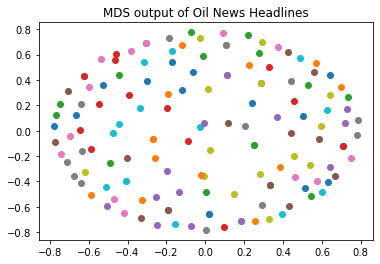

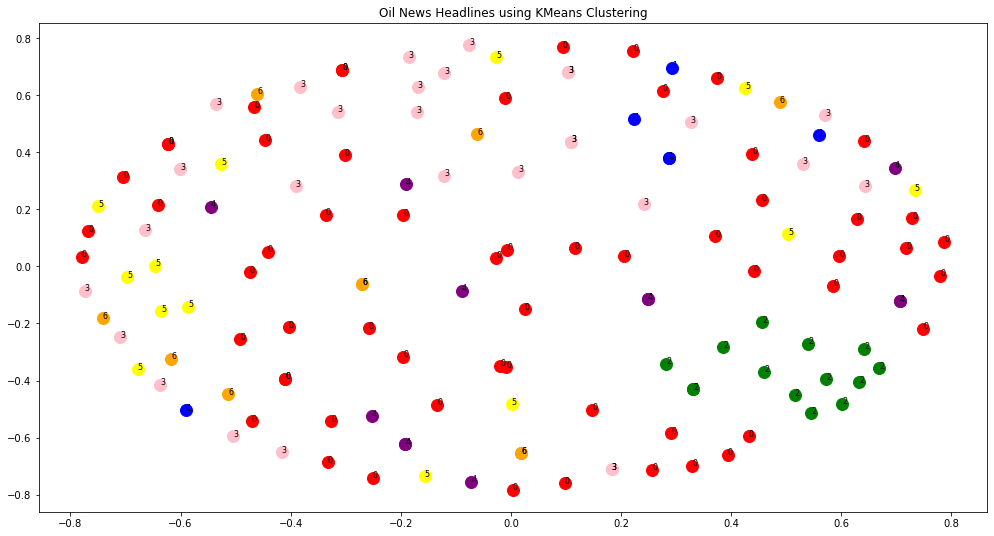

In [36]:
from sklearn.cluster import KMeans
terms = tfidf_vectorizer.get_feature_names()

km = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=1, verbose=0, random_state=3425)
km.fit(tfidf_matrix)
labels = km.labels_
clusters = labels.tolist()


distance = 1 - cosine_similarity(tfidf_matrix)

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(distance)
xs, ys = pos[:, 0], pos[:, 1]


for x, y, in zip(xs, ys):
    plt.scatter(x, y)
plt.title('MDS output of Oil News Headlines')
plt.savefig(os.path.join(path, 'MDS_10_new.png'))

df = pd.DataFrame(dict(label=clusters, data=data['text'], x=xs, y=ys))
df.to_csv(os.path.join(path, 'kmeans_clustered_DF_10_new.txt'), sep=',')

label_color_map = {0: 'red',
                       1: 'blue',
                       2: 'green',
                       3: 'pink',
                       4: 'purple',
                       5: 'yellow',
                       6: 'orange',
                       7: 'grey'
                       }

csv = open(os.path.join(path, 'kmeans_clustered_output_10_new.txt'), 'w')
csv.write('Cluster  Oil   Headline\n')

fig, ax = plt.subplots(figsize=(17, 9))

for index, row in df.iterrows():
    cluster = row['label']
    label_color = label_color_map[row['label']]
    label_text = row['data']
    ax.plot(row['x'], row['y'], marker='o', ms=12, c=label_color)
    row = str(cluster) + ',' + label_text + '\n'
    csv.write(row)

    # ax.legend(numpoints=1)
for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['label'], size=8)

plt.title('Oil News Headlines using KMeans Clustering')
plt.savefig(os.path.join(path, 'oil_news_kmeans_10_new.png'))

In [37]:
from sklearn.manifold import LocallyLinearEmbedding

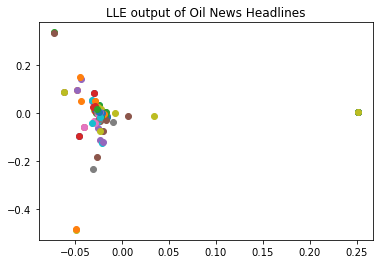

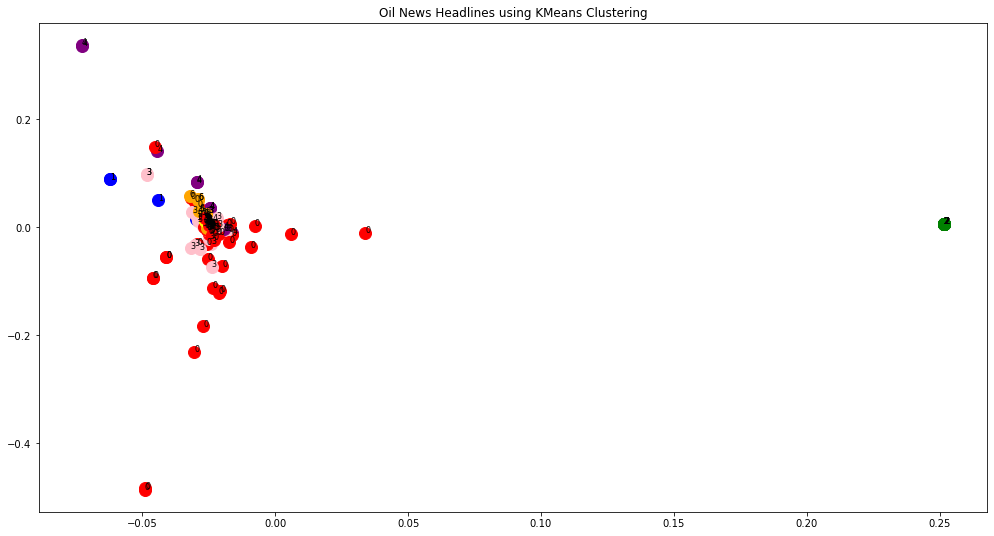

In [38]:
terms = tfidf_vectorizer.get_feature_names()

km = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=1, verbose=0, random_state=3425)
km.fit(tfidf_matrix)
labels = km.labels_
clusters = labels.tolist()


distance = 1 - cosine_similarity(tfidf_matrix)


embedding = LocallyLinearEmbedding(n_components=2) 
pos = embedding.fit_transform(distance)
xs, ys = pos[:, 0], pos[:, 1]


for x, y, in zip(xs, ys):
    plt.scatter(x, y)
plt.title('LLE output of Oil News Headlines')
plt.savefig(os.path.join(path, 'LLE_10_new.png'))

df = pd.DataFrame(dict(label=clusters, data=data['text'], x=xs, y=ys))
df.to_csv(os.path.join(path, 'kmeans_clustered_DF_10_LLE_new.txt'), sep=',')

label_color_map = {0: 'red',
                       1: 'blue',
                       2: 'green',
                       3: 'pink',
                       4: 'purple',
                       5: 'yellow',
                       6: 'orange',
                       7: 'grey'
                       }

csv = open(os.path.join(path, 'kmeans_clustered_output_10_LLE_new.txt'), 'w')
csv.write('Cluster  Oil   Headline\n')

fig, ax = plt.subplots(figsize=(17, 9))

for index, row in df.iterrows():
    cluster = row['label']
    label_color = label_color_map[row['label']]
    label_text = row['data']
    ax.plot(row['x'], row['y'], marker='o', ms=12, c=label_color)
    row = str(cluster) + ',' + label_text + '\n'
    csv.write(row)

for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['label'], size=8)

plt.title('Oil News Headlines using KMeans Clustering')
plt.savefig(os.path.join(path, 'oil_news_kmeans_10_LLE_new.png'))